In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
# The parameters of the two distributions
mu_coyote, sigma_coyote = 60, 10  
mu_wolf, sigma_wolf = 80, 8  

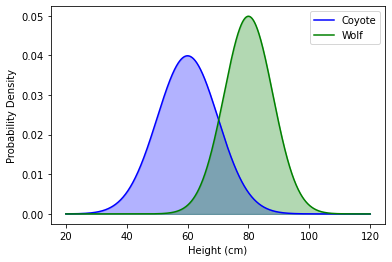

In [3]:
# Generate points on the x axis (heights) from 20 to 120 cm
x = np.linspace(20, 120, 1000)

# Probability density functions (PDFs) for the two species
pdf_coyote = norm.pdf(x, mu_coyote, sigma_coyote)
pdf_wolf = norm.pdf(x, mu_wolf, sigma_wolf)

# Plot the PDFs
plt.plot(x, pdf_coyote, label='Coyote', color='blue')
plt.fill_between(x, pdf_coyote, color='blue', alpha=0.3)
plt.plot(x, pdf_wolf, label='Wolf', color='green')
plt.fill_between(x, pdf_wolf, color='green', alpha=0.3)

plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.savefig('figures/bayes_error.pdf')

In [4]:
# Find the intersection point x*
from scipy.optimize import fsolve

def wolf_pdf(x):
    return (1 / (sigma_wolf * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_wolf) / sigma_wolf)**2)

def coyote_pdf(x):
    return (1 / (sigma_coyote * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_coyote) / sigma_coyote)**2)

def intersection_point(x):
    return wolf_pdf(x) - coyote_pdf(x)

x_star = fsolve(intersection_point, 70)  # Initial guess
x_star[0]

70.22732405099019